# METHODOLOGY
Trong phần này, chúng ta mô tả việc triển khai và các giao thức đào tạo của các mô hình đã thảo luận trước đó, cũng như các bộ dữ liệu và quy trình chúng ta sử dụng để nghiên cứu tính hiệu quả và hiệu quả của chúng.

Table content
* [4.1 Datasets](#4.1Datasets)
* [4.2 Efficiency Analysis](#4.2EfficiencyAnalysis)
* [4.3 Effectiveness Analysis](#4.3EffectivenessAnalysis)
    * [4.3.1 Number of Peers](#4.3.1NumberofPeers)

## 4.1 Datasets
Các bộ dữ liệu cho **benchmarking-(chấm điểm)** LP thường được lấy bằng cách lấy mẫu KG trong thế giới thực, sau đó chia các dữ liệu thu được thành các tập training, a validation and a test set. Chúng tôi tiến hành phân tích bằng cách sử dụng 5 bộ dữ liệu được thiết lập tốt nhất trong trường LP; chúng tôi báo cáo một số thuộc tính quan trọng nhất của chúng trong Bảng 2.

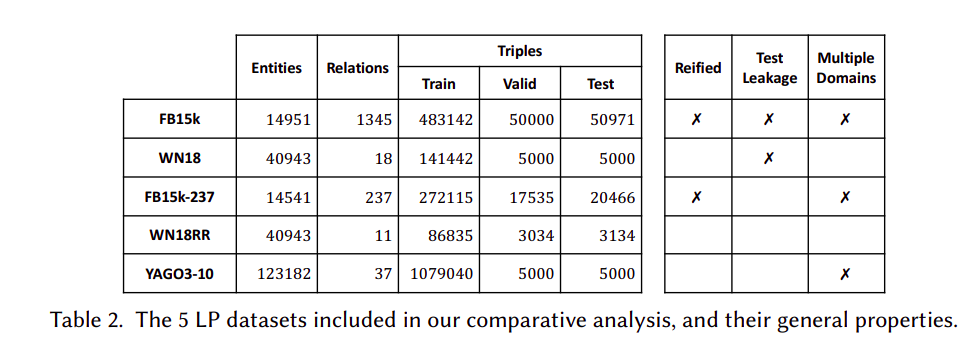

In [1]:
from IPython.display import Image
Image(filename='../images/table2.png')

**FB15k** có lẽ là bộ dữ liệu được sử dụng phổ biến nhất để *benchmark* cho đến nay. Những người tạo ra nó [8](../papers/models/8_TransE.pdf) đã chọn tất cả các thực thể *FreeBase* với hơn 100 đề cập và cũng có trong cơ sở dữ liệu [Wikilinks](https://code.google.com/archive/p/wiki-links/); họ đã trích xuất tất cả các sự kiện liên quan đến họ (bao gồm cả những người hàng xóm cấp thấp hơn), ngoại trừ những một vài thực thể tối nghĩa, ví dụ: ngày tháng, danh từ riêng, v.v ... họ cũng đã chuyển đổi các mối quan hệ $n$-ary (n- cung) được biểu thị bằng sự thống nhất thành các cụm của các cạnh nhị phân; Hoạt động này đã hỗ trợ rất nhiều cho cấu trúc đồ thị và ngữ nghĩa, như được mô tả trong Phần 4.3.4

**WN18** cũng được giới thiệu bởi các tác giả của [TransE-8](../papers/models/8_TransE.pdf), đã được trích xuất từ WordNet3, một bản thể học ngôn ngữ **KG** có nghĩa là cung cấp một dictionary/thesaurus (từ điển) để hỗ trợ NLP và phân tích văn bản tự động. Trong WordNet, các thực thể tương ứng với các từ đồng nghĩa ***synsets*** (word senses) và các mối quan hệ đại diện cho các kết nối từ vựng của chúng (ví dụ: *hypernym*). Để xây dựng WN18, các tác giả đã sử dụng WordNet làm điểm khởi đầu và sau đó lặp đi lặp lại các thực thể và mối quan hệ với quá ít đề cập ***with too few mentions***.

**FB15k-237** là một tập hợp con của FB15k được xây dựng bởi [Toutanova và Chen 57](../papers/datasets/57_FB15k-237.pdf), lấy cảm hứng từ quan sát rằng FB15k bị *test leakage* (rò rỉ thử nghiệm), bao gồm dữ liệu thử nghiệm được nhìn thấy bởi các mô hình tại thời điểm đào tạo. Trong FB15k vấn đề này là do sự hiện diện của các mối quan hệ gần giống nhau hoặc nghịch đảo của nhau. Để đánh giá mức độ nghiêm trọng của vấn đề này, Toutanova và Chen đã chỉ ra rằng một mô hình đơn giản dựa trên các đặc trưng quan sát *observable features* có thể dễ dàng đạt được hiệu suất tốt trên FB15k *state-of-the-art performance*. FB15k-237 được xây dựng để trở thành một bộ dữ liệu thách thức hơn: các tác giả lần đầu tiên chọn các sự kiện từ FB15k liên quan đến mối quan hệ lớn nhất $401$ và loại bỏ tất cả các mối quan hệ tương đương hoặc nghịch đảo. Để lọc tất cả các bộ ba tầm thường *trivial triples*, họ cũng đảm bảo rằng không có thực thể nào được kết nối trong tập huấn luyện cũng được liên kết trực tiếp trong validation and test sets.

**WN18RR** là một tập hợp con của WN18 được xây dựng bởi [Dettmers et al.11](../papers/models/11_ConvE.pdf), cũng là một rò rỉ thử nghiệm quan sát *observing test leakage* trong **WN18**. họ chứng minh mức độ nghiêm trọng của rò rỉ nói trên bằng cách chỉ ra rằng một mô hình dựa trên quy tắc đơn giản dựa trên phát hiện quan hệ nghịch đảo, được đặt tên là Mô hình nghịch đảo **Inverse Model**, đạt được kết quả tiên tiến trong cả **WN18** và **FB15k**. Để giải quyết điều đó, họ xây dựng bộ dữ liệu WN18RR khó khăn hơn nhiều bằng cách áp dụng một đường ống **pipeline** tương tự như đường dẫn được sử dụng cho [FB15k-237_57](../papers/datasets/57_FB15k-237.pdf). Gần đây, các tác giả đã thừa nhận rằng bộ thử nghiệm bao gồm $212$ thực thể không xuất hiện trong tập huấn luyện, khiến cho không thể dự đoán hợp lý khoảng $6,7\%$ sự kiện kiểm tra

**YAGO3-10** được lấy mẫu từ [YAGO3 KG-36](../papers/datasets/36_YAGO3-10.pdf), cũng được đề xuất bởi [Dettmers et al.11](../papers/models/11_ConvE.pdf). Nó đã thu được lựa chọn các thực thể có ít nhất 10 mối quan hệ khác nhau và thu thập tất cả các sự kiện liên quan đến chúng, do đó bao gồm cả các thành phần láng giềng. Hơn nữa, không giống như **FB15k** và **FB15k-237, YAGO3-10** cũng lưu giữ các **facts**(sự kiện) về các phân phối văn bản được tìm thấy trong **KG**. Kết quả là, như các tác giả đã nêu, phần lớn các bộ ba của nó liên quan đến các đặc trưng mô tả của mọi người, chẳng hạn như quyền công dân hoặc giới tính trong các hoạt động kém của Inverse Model - (Mô hình nghịch đảo) [Dettmers et al.11](../papers/models/11_ConvE.pdf) trong YAGO3-10 cho thấy rằng *benchmark* này không nên lấy từ các vấn đề rò rỉ thử nghiệm **test leakage issues** tương tự như FB15k và WN18.

Tóm gọn :

* FB15k : Là tập dữ liệu về link trích xuất từ wikilink, mỗi entities là một mã link riêng biệt duy nhất, relation là dường dẫn thể hiện sự liên kết.

```
/m/027rn	/location/country/form_of_government	/m/06cx9
```

* WN18 : là tập dữ liệu về từ ngữ, mô hình hóa sự liên kết ngữ nghĩa của các từ

```
03964744	_hyponym	04371774
```

* FB15k-237 : là tập dữ liệu là nhánh con của FB15k. Loại bỏ đi các bộ ba liên kết gần như đã xác định được kết quả dự đoán, nghịch đảo để nhằm làm tăng độ khó cho tập dữ liệu.

```
/m/027rn	/location/country/form_of_government	/m/06cx9
```

* WN18RR (gồm 212 entities) :  là một nhánh con tương đương với WN18 nhưng rút ra các quan hệ nghịch đảo hoặc tương đương. Để làm tăng độ khó cho dữ liệu

```
00260881	_hypernym	00260622
```

* YAGO3-10 : là tập dữ liệu YAGO 3 chứa 10 gigabyte lấy từ nhiều tập dữ liệu khác nhau, với nhiều ngôn ngữ thể hiện cho quá trình xử lý với những dữ liệu rất lớn

```
<id_abcd> <Elvis_Presley>  <marriedTo>  <Priscilla_Presley>
```

Xử lý trên tập dữ liệu YAGO 3
https://colab.research.google.com/drive/1RSc7V9cnq4x0Ya7XkTM-cN_hH2p6ERrp

## 4.2 Efficiency Analysis
Đối với mỗi mô hình, chúng tôi xem xét hai công thức chính cho hiệu quả:

* *Thời gian đào tạo - Training Time*: thời gian cần thiết để tìm hiểu các **optimal embeddings** cho tất cả các thực thể và quan hệ.
* *Thời gian dự đoán - Prediction Time*: thời gian cần thiết để tạo ra thứ hạng **Ranks** đầy đủ cho một **fact**-(thực tế) thử nghiệm, bao gồm cả **head and tail predictions**.

Thời gian đào tạo và thời gian dự đoán chủ yếu phụ thuộc:
* (i) vào kiến trúc mô hình (ví dụ: mạng lưới thần kinh sâu có thể yêu cầu tính toán dài hơn do **pipeline** hoạt động vốn có của chúng dài hơn); 
* (ii) trên các mô hình siêu tham số-**model hyperparameters**, chẳng hạn như kích thước nhúng-**embedding size** và số lượng mẫu âm tính cho mỗi mẫu dương tính - **number of negative samples for each positive**; 
* (iii) về kích thước tập dữ liệu, cụ thể là số lượng thực thể và quan hệ cần tìm hiểu và, trong Thời gian đào tạo, số lượng bộ ba đào tạo cần xử lý.

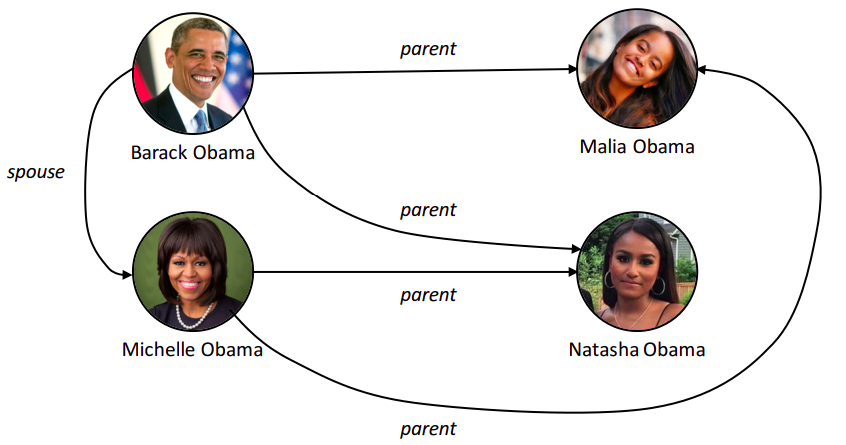

In [2]:
from IPython.display import Image
Image(filename='../images/fig-2_kg.png')

**fig 2** Ví dụ về ***head peers*** và ***tail peers*** trong một phần nhỏ của KG

## 4.3 Effectiveness Analysis
Chúng tôi phân tích tính hiệu quả của các mô hình LP dựa trên cấu trúc của đồ thị đào tạo. do đó, chúng tôi xác định các đặc điểm cấu trúc có thể đo lường được và chúng tôi coi mỗi trong số chúng là một hướng nghiên cứu riêng biệt, điều tra xem nó có liên quan như thế nào đến hiệu suất dự đoán của từng mô hình trong mỗi tập dữ liệu.
Chúng ta tính đến 4 đặc cấu trúc khác nhau cho mỗi thực tế thử nghiệm:
* Number of Peers: cụ thể là các lựa chọn thay thế hợp lệ cho các thực thể nguồn và đích-nói cách khác là số lượng thực thể;
* Relational Path Support: có tính đến các đường dẫn kết nối head và tail của fact thử nghiệm- nói cách khác có tính đến hướng của quan hệ;
* Relation Properties: điều đó ảnh hưởng đến cả ngữ nghĩa và cấu trúc đồ thị;
* Degree of the original reified relation: cho các bộ dữ liệu được tạo từ KG bằng cách sử dụng quan hệ thống nhất

### 4.3.1 Number of Peers
* head peers: là tập các thực thể sao cho $h^{\prime} \in \mathcal{E}\ | \ \langle h^{\prime},\ r, \ t \rangle \ \in \mathcal{G}_{train}$
* tail peers: là tập các thực thể sao cho $t^{\prime} \in \mathcal{E}\ | \ \langle h,\ r, \ t^{\prime} \rangle \ \in \mathcal{G}_{train}$

Nói cách khác, các **head peers** là tất cả các lựa chọn thay thế cho h trong quá trình đào tạo, với điều kiện là có quan hệ $r$ và tail $t$. Tương tự, các **tail peers** là lựa chọn thay thế cho $t$ khi **head** là $h$ và quan hệ là $r$. Nhất quán với ký hiệu được giới thiệu trong Phần 2, chúng tôi xác định các *source peers* và *target peers* (thực thể đích) của một dự đoán là các **source peers** và các **target peers** tương ứng.

Chúng tôi minh họa một ví dụ trong Hình 2: xem xét fact (thực tế) $\langle$ *Barack Obama, parent, Malia Obama* $\rangle$, thực thể *Michelle Obama* sẽ là đồng đẳng của *Barack Obama*, bởi vì thực thể *Michelle Obama* cũng là *parent* của *Malia Obama*. Tương tự, thực thể *Natasha Obama* là đồng đẳng của *Malia Obama*. Theo dự đoán, khi *Malia Obama* là **source entity** và Barack Obama là *target entity* , *Michelle Obama* là một *target peer* và *Natasha Obama* là một *source peer*. Theo dự đoán, *tail prediction peers* chỉ bị đảo ngược: kể từ bây giờ *Malia Obama* là *target entity* và *Barack Obama* là **source entity**, *Michelle Obama* là một *source peer* trong khi *Natasha Obama* là *target peer*.
Trực giác của chúng tôi là số lượng các *source peer* và *target peer* có thể tạo ra các dự đoán với các hình ảnh tinh tế, có thể không dự đoán được.

Một mặt, số lượng các *source peers* có thể được xem là số lượng mẫu đào tạo mà từ đó các mô hình có thể trực tiếp tìm hiểu cách dự đoán *current target entity given the current relation* (thực thể mục tiêu hiện tại với mối quan hệ hiện tại). Ví dụ, khi thực hiện  *tail prediction* trên fact $\langle$ *Barack Obama, nationality, USA* $\rangle$, các *source peers* là tất cả các thực thể khác có quốc tịch **USA** mà mô hình được nhìn thấy trong đào tạo: họ là những ví dụ mà các mô hình của chúng tôi có thể học được những gì có thể làm cho một người có quốc tịch **USA**.

Mặt khác, số lượng **target peers** có thể được xem là số câu trả lời thỏa mãn chính xác dự đoán này mà những mẫu được quan sát trong quá trình đào tạo. Ví dụ, được đưa ra **fact** giống như trước $\langle$ *Barack Obama, nationality, USA* $\rangle$, nhưng thực hiện *head prediction*, các công dân *USA* khác được nhìn thấy trong đào tạo hiện đang **target peers**. Vì tất cả chúng tạo thành các lựa chọn thay thế hợp lệ cho các câu ***target answers***, quá nhiều ***target peers*** có thể dẫn trực giác các mô hình đến sự nhầm lẫn và suy giảm hiệu suất.

Kết quả thử nghiệm của chúng tôi về **source and target peers**, được báo cáo trong Phần 5.3.1, giả thuyết của chúng tôi

### 4.3.2 Relational Path Support
Trong bất kỳ KG nào, một *path* là một chuỗi các sự kiện trong đó phần đuôi của mỗi sự kiện tương ứng với phần đầu của phần tiếp theo. *length* (độ dài) của đường dẫn là số lượng sự kiện liên tiếp mà nó chứa. Trong phần tiếp theo, chúng ta gọi chuỗi các tên quan hệ (bỏ qua các thực thể) trong một đường dẫn là một * relational path* (đường dẫn quan hệ).

Các đường dẫn quan hệ cho phép một thực thể xác định các điểm tương ứng với các mối quan hệ cụ thể. Chẳng hạn, khi biết sự thật $\langle$ *Barack Obama, place of birth, Honolulu* $\rangle$ và $\langle$ *Honkish, localted in, USA* $\rangle$ có thể dự đoán rằng $\langle$ *Barack Obama, nationality, USA* $ \rangle$ . Các đường dẫn đã được sử dụng trong một thời gian dài bằng các kỹ thuật LP dựa trên các đặc trưng có thể quan sát được, chẳng hạn như [Path Ranking Algorithm 31](../papers/31_Relational_retrieval_using_a_combination_of_path-constrained_random_walks.pdf),[32](../papers/32_Random_Walk_Inference_and_Learning_in_A_Large_Scale_Knowledge_Base.pdf). Nhưng không còn được sử dụng bởi các **models based on embeddings**, trong đó phần lớn trong số họ tìm hiểu các sự kiện riêng lẻ. Chỉ một vài mô hình dựa trực tiếp vào đường dẫn, ví dụ: *PTransE* hoặc, trong phân tích của chúng tôi, [RSN-19]; một số mô hình không sử dụng các đường dẫn trực tiếp trong đào tạo mà sử dụng chúng cho các nhiệm vụ bổ sung, như phương pháp giải thích ** explanation approach** được đề xuất bởi [CrossE-72](../papers/models/72_CrossE.pdf).

Trực giác của chúng tôi là ngay cả các mô hình đào tạo các sự kiện riêng lẻ, khi chúng dần dần quét và tìm hiểu toàn bộ tập huấn luyện, cũng có được kiến thức gián tiếp về các đường dẫn của nó. Kết quả là, theo 1 cách phức tạp, họ có thể tận dụng ở một mức độ nào đó các mẫu có thể quan sát được trong các đường dẫn để đưa ra dự đoán tốt hơn.

Vì vậy, chúng ta nhiên cứu làm thế nào sự hỗ trợ được cung cấp bởi các đường dẫn trong đào tạo có thể giúp dự đoán thử nghiệm dễ dàng hơn cho các ***embedding-based models*** (mô hình dựa trên nhúng). Chúng tôi xác định một biện pháp mới về *Relational Path Support (RPS)* ước tính cho bất kỳ **fact** (thực tế) nào các đường dẫn kết nối **connecting the head to the tail** tạo điều kiện cho dự đoán của họ. Cụ thể hơn, giá trị **RPS** cho một **fact**  $\langle$ *h, r, t*  $\rangle$  đo lường cách các đường dẫn quan hệ kết nối **h** với **t** khớp với những đường dẫn thường xảy ra nhất với **r**. Trong các mô hình phụ thuộc nhiều vào các mối quan hệ, giá trị **RPS** cao sẽ tương ứng với các dự đoán tốt, trong khi giá trị **RPS** thấp sẽ tương ứng với các mô hình xấu.

Số liệu **RPS** của chúng tôi là một biến thể của thước đo thống kê [TF-IDF 50](../papers/50_Introduction_to_information_retrieval.pdf) thường được sử dụng trong *Information Retrieval* (Truy xuất thông tin). giá trị $TF-IDF$ của bất kỳ từ $w$ nào trong tài liệu $D$ của bộ sưu tập $C$ đo lường cả mức độ phù hợp và mức độ cụ thể của $w$ đối với $D$, dựa trên tần số của $w$ trong $D$ và trên số lượng tài liệu khác trong $C$ bao gồm $w$ . Bất kỳ tài liệu và bất kỳ truy vấn dựa trên từ khóa nào cũng có thể được mô hình thành một vectơ với các giá trị $TF-IDF$ của tất cả các từ trong từ vựng. Đưa ra bất kỳ truy vấn $Q$ nào, công cụ tìm kiếm dựa trên $TF-IDF$ sẽ truy xuất các tài liệu có vectơ giống với vectơ của $Q$.

Trong kịch bản của chúng ta, chúng ta coi mỗi **relation path** (đường dẫn quan hệ) $p$ là một từ và mỗi quan hệ $r$ là một tài liệu. Khi một đường dẫn quan hệ $p$ cùng xuất hiện với một mối quan hệ $r$ (nghĩa là nó **connects the head and tail** của một **fact** (thực tế) có $r$) chúng ta hiểu đây là từ $p$ thuộc về tài liệu $r$. Chúng tôi coi mỗi **test fact** $q$ là một truy vấn có từ khóa là các **relation paths connecting its head to the tail** đường dẫn quan hệ nối head của nó với tail. Chi tiết hơn, đây là quy trình chúng tôi áp dụng để tính toán phương pháp $RPS$ của chúng tôi:

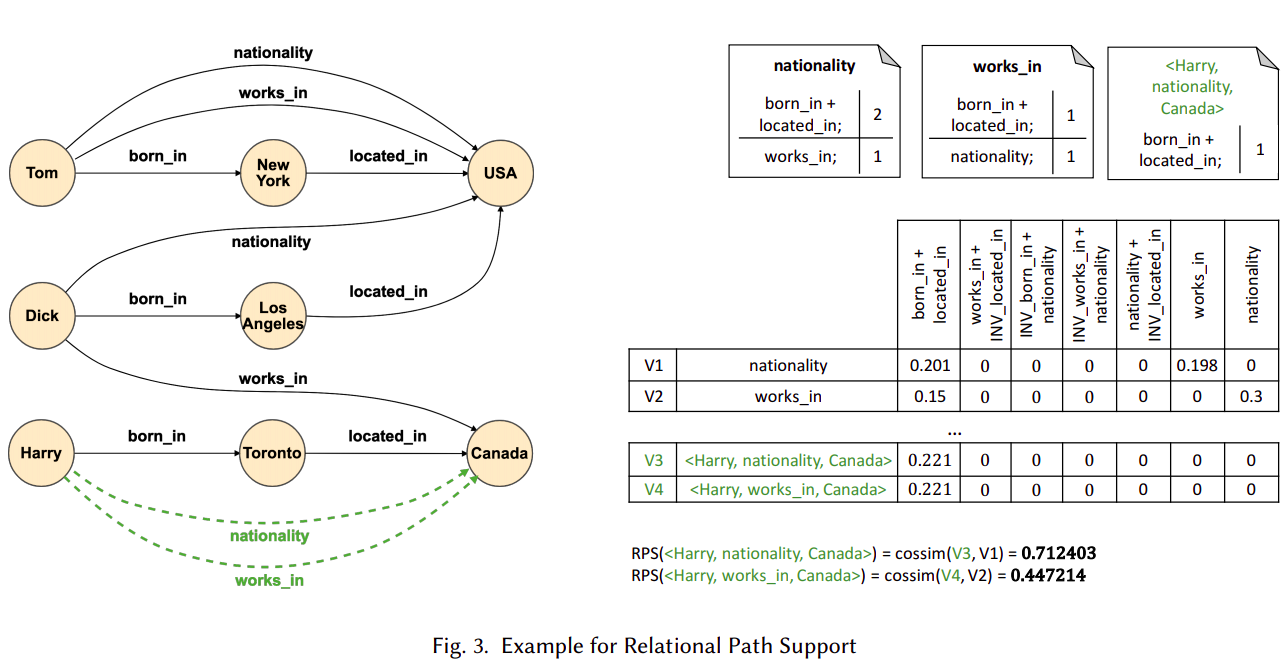

In [2]:
from IPython.display import Image
Image(filename='../images/fig-3_kg.png')

* (1). Đối với mỗi thực tế đào tạo hh, r, ti, chúng tôi trích xuất từ Gt r ain tập hợp các đường dẫn quan hệ p dẫn từ h đến t. Bất cứ khi nào trong một đường dẫn, một bước không có định hướng chính xác, chúng tôi sẽ đảo ngược nó và đánh dấu mối quan hệ của nó với trước € x. Từ vựng V của chúng tôi là tập hợp các đường dẫn quan hệ kết quả. Do các ràng buộc tính toán, chúng tôi giới hạn bản thân trong các đường dẫn quan hệ có độ dài bằng hoặc nhỏ hơn 3.
* (2).